In [5]:
import pandas as pd
import json
import matplotlib.pyplot as plt


# fMRI data

In [2]:
data = pd.read_csv("/media/RCPNAS/MIP/Michael/ml-students2024/data/fmri414_compiled/AfterTheRain_compiled414.csv")
data

,filename,vindex,full_region,partial_region,score,movie_name,parcel,id,session
0,TC_414_sub-S25_AfterTheRain.csv,0,7Networks_LH_Vis_1,Vis,-28.029734,AfterTheRain,400,sub-S25,ses-1
1,TC_414_sub-S25_AfterTheRain.csv,0,7Networks_LH_Vis_1,Vis,-28.084551,AfterTheRain,400,sub-S25,ses-1
2,TC_414_sub-S25_AfterTheRain.csv,0,7Networks_LH_Vis_1,Vis,-1.884319,AfterTheRain,400,sub-S25,ses-1
3,TC_414_sub-S25_AfterTheRain.csv,0,7Networks_LH_Vis_1,Vis,-0.738570,AfterTheRain,400,sub-S25,ses-1
4,TC_414_sub-S25_AfterTheRain.csv,0,7Networks_LH_Vis_1,Vis,48.665913,AfterTheRain,400,sub-S25,ses-1
...,...,...,...,...,...,...,...,...,...
6691063,TC_414_sub-S28_AfterTheRain.csv,413,Right Accumbens,Sub,16.858381,AfterTheRain,14,sub-S28,ses-3
6691064,TC_414_sub-S28_AfterTheRain.csv,413,Right Accumbens,Sub,22.814312,AfterTheRain,14,sub-S28,ses-3
6691065,TC_414_sub-S28_AfterTheRain.csv,413,Right Accumbens,Sub,-12.612755,AfterTheRain,14,sub-S28,ses-3
6691066,TC_414_sub-S28_AfterTheRain.csv,413,Right Accumbens,Sub,31.981007,AfterTheRain,14,sub-S28,ses-3


In [3]:
data[(data["full_region"] == "Right Accumbens") & (data["id"] == "sub-S25")]["score"]

# 536 is the number of timepoints (differt for each movie)

6471768   -51.667576
6471769   -24.377392
6471770   -15.085900
6471771    14.842817
6471772    32.459091
             ...    
6472299   -22.196739
6472300   -66.157936
6472301   -35.309834
6472302    -3.528805
6472303   -82.982246
Name: score, Length: 536, dtype: float64

In [4]:
# Columns
data.keys()

Index(['filename', 'vindex', 'full_region', 'partial_region', 'score',
       'movie_name', 'parcel', 'id', 'session'],
      dtype='object')

In [5]:
# vindex: enciding of the rois
data.vindex.unique()

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [6]:
# ROI region
print(len(data.full_region.unique()))
rois = data.full_region.unique()
rois

414


array(['7Networks_LH_Vis_1', '7Networks_LH_Vis_2', '7Networks_LH_Vis_3',
       '7Networks_LH_Vis_4', '7Networks_LH_Vis_5', '7Networks_LH_Vis_6',
       '7Networks_LH_Vis_7', '7Networks_LH_Vis_8', '7Networks_LH_Vis_9',
       '7Networks_LH_Vis_10', '7Networks_LH_Vis_11',
       '7Networks_LH_Vis_12', '7Networks_LH_Vis_13',
       '7Networks_LH_Vis_14', '7Networks_LH_Vis_15',
       '7Networks_LH_Vis_16', '7Networks_LH_Vis_17',
       '7Networks_LH_Vis_18', '7Networks_LH_Vis_19',
       '7Networks_LH_Vis_20', '7Networks_LH_Vis_21',
       '7Networks_LH_Vis_22', '7Networks_LH_Vis_23',
       '7Networks_LH_Vis_24', '7Networks_LH_Vis_25',
       '7Networks_LH_Vis_26', '7Networks_LH_Vis_27',
       '7Networks_LH_Vis_28', '7Networks_LH_Vis_29',
       '7Networks_LH_Vis_30', '7Networks_LH_Vis_31',
       '7Networks_LH_SomMot_1', '7Networks_LH_SomMot_2',
       '7Networks_LH_SomMot_3', '7Networks_LH_SomMot_4',
       '7Networks_LH_SomMot_5', '7Networks_LH_SomMot_6',
       '7Networks_LH_SomMot

In [7]:
# Limbic rois
limbic_rois = [roi for roi in rois if 'Limbic' in roi]

print(limbic_rois)

['7Networks_LH_Limbic_OFC_1', '7Networks_LH_Limbic_OFC_2', '7Networks_LH_Limbic_OFC_3', '7Networks_LH_Limbic_OFC_4', '7Networks_LH_Limbic_OFC_5', '7Networks_LH_Limbic_TempPole_1', '7Networks_LH_Limbic_TempPole_2', '7Networks_LH_Limbic_TempPole_3', '7Networks_LH_Limbic_TempPole_4', '7Networks_LH_Limbic_TempPole_5', '7Networks_LH_Limbic_TempPole_6', '7Networks_LH_Limbic_TempPole_7', '7Networks_LH_Limbic_TempPole_8', '7Networks_RH_Limbic_OFC_1', '7Networks_RH_Limbic_OFC_2', '7Networks_RH_Limbic_OFC_3', '7Networks_RH_Limbic_OFC_4', '7Networks_RH_Limbic_OFC_5', '7Networks_RH_Limbic_OFC_6', '7Networks_RH_Limbic_TempPole_1', '7Networks_RH_Limbic_TempPole_2', '7Networks_RH_Limbic_TempPole_3', '7Networks_RH_Limbic_TempPole_4', '7Networks_RH_Limbic_TempPole_5', '7Networks_RH_Limbic_TempPole_6', '7Networks_RH_Limbic_TempPole_7']


In [8]:
# score: fRMI value fo that roi
data.score

0         -28.029734
1         -28.084551
2          -1.884319
3          -0.738570
4          48.665913
             ...    
6691063    16.858381
6691064    22.814312
6691065   -12.612755
6691066    31.981007
6691067     8.570053
Name: score, Length: 6691068, dtype: float64

In [9]:
# movie name: it is just one for this csv
data.movie_name.unique()

array(['AfterTheRain'], dtype=object)

In [10]:
#parcel: to sau if the roi belongs to cortex(400) or subcortical(14region)
data.parcel.unique()

array([400,  14])

In [11]:
# id: subejct id (same person acorss differtn movies)
print(len(data.id.unique()))
data.id.unique()


30


array(['sub-S25', 'sub-S14', 'sub-S28', 'sub-S22', 'sub-S13', 'sub-S19',
       'sub-S21', 'sub-S10', 'sub-S26', 'sub-S17', 'sub-S16', 'sub-S27',
       'sub-S11', 'sub-S20', 'sub-S23', 'sub-S29', 'sub-S15', 'sub-S24',
       'sub-S07', 'sub-S31', 'sub-S09', 'sub-S03', 'sub-S32', 'sub-S04',
       'sub-S05', 'sub-S02', 'sub-S08', 'sub-S30', 'sub-S01', 'sub-S06'],
      dtype=object)

In [12]:
# session: each movie belongs ti a session, not needed
data.session.unique()

array(['ses-1', 'ses-4', 'ses-2', 'ses-3'], dtype=object)

# 3FA_13_... --> Regression
Timepoints x 3D emotion vector

In [13]:
data_FA = pd.read_csv("/media/RCPNAS/MIP/Michael/ml-students2024/data/emo_labels/3FA_13_AfterTheRain_stim.tsv", sep="\t", header=None)
display(data_FA)
print(data_FA.shape)

,0,1,2
0,0.062038,-0.055615,-0.007722
1,0.119193,-0.153144,-0.064015
2,0.091335,-0.232850,-0.087937
3,0.091717,-0.282185,-0.238881
4,0.006933,-0.375267,-0.311223
...,...,...,...
377,-0.243349,0.167522,0.146447
378,-0.219026,0.147048,0.131659
379,-0.223654,0.221852,0.069055
380,-0.240392,0.289503,0.016532


(382, 3)


# Annot_13_... --> Classification
Timepoints x 50 emotion scores (NB not prob)

In [ ]:
data_13 = pd.read_csv("/media/RCPNAS/MIP/Michael/ml-students2024/data/emo_labels/Annot_13_AfterTheRain_stim.tsv", sep="\t", header=None)
display(data_13)
print(data_13.shape)

# THIS ONE IS IN TR

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,0.142779,0.281039,0.250808,0.330057,-0.341303,-0.076385,1.608596,-0.027852,-0.552002,-0.046603,...,-0.092547,0.380354,-0.154463,-0.041718,-0.652966,0.108885,0.336159,-0.336729,0.276114,-0.135235
1,0.015013,0.494496,0.249501,0.452919,-0.385233,0.149844,1.759461,-0.145757,-0.384084,-0.902979,...,-0.027584,0.501055,-0.414479,-0.165635,-1.018303,0.296978,0.325535,-0.252170,0.333992,-0.578877
2,0.111895,0.379248,0.301687,0.408731,-0.176680,0.071492,1.389783,-0.254050,-0.434333,-1.026354,...,-0.013293,0.442290,-0.759266,-0.114860,-1.350485,0.218283,0.331140,-0.338974,0.302379,-0.411378
3,0.003497,0.436360,0.348070,0.260503,0.043851,0.112154,1.395174,-0.403072,-0.411058,-1.142819,...,-0.335850,0.341601,-0.905446,-0.147157,-1.813156,0.240899,0.326921,-0.250029,-0.498317,-0.506159
4,0.047341,0.398398,0.408016,0.029337,0.051369,0.089824,-0.004560,-0.435806,-0.423261,-1.183318,...,-0.606533,-0.037521,-0.805941,-0.123036,-1.928912,0.117960,0.330476,-0.341319,-0.926475,-0.436339
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
377,0.277206,-1.045674,0.421057,-0.269402,0.164704,-1.506539,-0.346101,-0.116795,-0.937967,1.257121,...,-0.590204,-0.324680,1.250120,0.987560,0.251219,-1.015855,0.315018,-0.256915,0.263425,2.326082
378,0.524119,-1.008301,0.444389,-0.253474,0.136510,-1.453164,-0.322620,-0.163597,-0.937614,1.206495,...,-0.567566,-0.319971,1.235208,0.766997,0.276231,-0.834010,0.312180,-0.324791,0.252895,2.426452
379,0.591231,-1.054814,0.386529,-0.362685,0.157114,-1.512554,-0.394329,0.425116,-0.927401,1.276505,...,-0.594464,-0.356155,1.253439,0.638471,0.371185,-0.931027,0.349242,-0.061968,0.163288,2.491647
380,0.513245,-1.010311,0.363760,-0.396944,0.128605,-1.438676,-0.308226,1.816271,-1.121465,1.185748,...,-0.560363,-0.324078,1.232280,0.627761,0.383667,-0.909971,0.380808,-0.312220,-0.045752,2.392124


(382, 50)


# Annot...json
Info on:
- sampling freq
- the 50 emotions names
- startime

In [5]:
with open("/media/RCPNAS/MIP/Michael/ml-students2024/data/emo_labels/Annot_AfterTheRain_stim.json", 'r') as file:
    data = json.load(file)
    print(data) 
    print(data.keys())
    for index, value in enumerate(data["Columns"], start=0):
        print(f"{index}: {value}")

{'SamplingFrequency': 1.0, 'Columns': ['Standards', 'PleasantSelf', 'SocialNorms', 'PleasantOther', 'GoalsOther', 'Controlled', 'Predictable', 'Suddenly', 'Agent', 'Urgency', 'Lips', 'Tears', 'Eyebrows', 'Smile', 'Frown', 'Stop', 'Undo', 'Repeat', 'Oppose', 'Attention', 'Tackle', 'Command', 'Support', 'Move', 'Care', 'Bad', 'Good', 'Calm', 'Strong', 'IntenseEmotion', 'Alert', 'AtEase', 'Muscle', 'Heartrate', 'Throat', 'Stomach', 'Warm', 'Anger', 'Guilt', 'WarmHeartedness', 'Disgust', 'Happiness', 'Fear', 'Regard', 'Anxiety', 'Satisfaction', 'Pride', 'Surprise', 'Love', 'Sad'], 'StartTime': 0}
dict_keys(['SamplingFrequency', 'Columns', 'StartTime'])
0: Standards
1: PleasantSelf
2: SocialNorms
3: PleasantOther
4: GoalsOther
5: Controlled
6: Predictable
7: Suddenly
8: Agent
9: Urgency
10: Lips
11: Tears
12: Eyebrows
13: Smile
14: Frown
15: Stop
16: Undo
17: Repeat
18: Oppose
19: Attention
20: Tackle
21: Command
22: Support
23: Move
24: Care
25: Bad
26: Good
27: Calm
28: Strong
29: Intense

# Annot...tsv --> not to use


In [ ]:
data_tsv = pd.read_csv("/media/RCPNAS/MIP/Michael/ml-students2024/data/emo_labels/Annot_AfterTheRain_stim.tsv", sep="\t", header=None)
display(data_tsv)
print(data_tsv.shape)
# this onw is per second (NOT USE !!!!) (the other is by Tr)

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,0.105069,0.453663,0.237408,0.424665,-0.388207,0.097503,1.862368,-0.079510,-0.418996,-0.208150,...,-0.043765,0.471479,-0.308988,-0.133703,-0.855552,0.246556,0.328818,-0.295054,0.333593,-0.470214
1,0.024357,0.449826,0.238010,0.424665,-0.388207,0.097503,1.747290,-0.134586,-0.418996,-0.737396,...,-0.031966,0.471479,-0.308988,-0.133703,-0.856457,0.246556,0.328818,-0.295054,0.333593,-0.470214
2,0.070704,0.414445,0.293824,0.424665,-0.291213,0.097503,1.504896,-0.188682,-0.418996,-0.999275,...,-0.031966,0.471479,-0.588825,-0.133703,-1.210829,0.246556,0.328818,-0.295054,0.333593,-0.470214
3,0.105296,0.413923,0.292980,0.406338,-0.101414,0.097503,1.435084,-0.296824,-0.418996,-1.084361,...,-0.031966,0.432859,-0.873184,-0.133703,-1.495191,0.246556,0.328818,-0.295054,0.179468,-0.470214
4,-0.019593,0.413923,0.371977,0.218044,0.058179,0.097503,1.354356,-0.425361,-0.418996,-1.121516,...,-0.402893,0.326432,-0.873184,-0.133703,-1.831240,0.217631,0.328818,-0.295054,-0.612967,-0.469630
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
491,0.593533,-1.028671,0.434239,-0.270748,0.146468,-1.480591,-0.357942,-0.108174,-0.935618,1.240396,...,-0.579717,-0.333254,1.243418,0.721175,0.290289,-0.848065,0.313952,-0.293570,0.227265,2.452950
492,0.551877,-1.028671,0.398239,-0.339294,0.146466,-1.480594,-0.358289,0.285385,-0.943892,1.237758,...,-0.579717,-0.341227,1.243418,0.638495,0.353123,-0.867606,0.344441,-0.063489,0.187181,2.452950
493,0.568973,-1.037292,0.356205,-0.407646,0.146466,-1.480591,-0.358289,1.481702,-0.961229,1.233383,...,-0.579717,-0.345177,1.243418,0.637543,0.392902,-1.014580,0.378317,-0.239620,0.052355,2.452950
494,0.488951,-1.065310,0.381255,-0.417663,0.125037,-1.480591,-0.358289,1.940805,-1.477601,1.277470,...,-0.579717,-0.338783,1.240597,0.637543,0.439990,-0.793922,0.378317,-0.293570,-0.268313,2.452950


(496, 50)


# C_Annot_13_FILMS_stim.tsv

In [ ]:
data_C = pd.read_csv("/media/RCPNAS/MIP/Michael/ml-students2024/data/emo_labels/C_Annot_13_FILMS_stim.tsv", sep="\t", header=None)
display(data_C)
print(data_C.shape)

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,0.263360,0.546963,0.409547,0.554681,-0.113338,0.190705,1.890254,-0.110807,-0.274060,-0.270165,...,-0.040571,0.554388,-0.372897,-0.057796,-0.829311,0.324834,0.246990,-0.364558,0.458023,-0.541158
1,-0.023828,0.410637,0.196802,0.376502,-0.461064,0.061883,1.664838,-0.141025,-0.462173,-0.829119,...,-0.041020,0.444189,-0.340309,-0.156522,-0.959306,0.219571,0.360713,-0.251888,0.279161,-0.444171
2,0.133948,0.424254,0.331615,0.453089,-0.132779,0.121227,1.443710,-0.248626,-0.395675,-1.067985,...,-0.008191,0.473864,-0.803536,-0.121396,-1.384967,0.264355,0.308540,-0.333257,0.329745,-0.487913
3,-0.012105,0.407157,0.328025,0.228293,0.014441,0.077964,1.355589,-0.412176,-0.434638,-1.115277,...,-0.339461,0.319310,-0.874498,-0.142129,-1.791698,0.207992,0.343929,-0.258212,-0.519068,-0.453536
4,0.059547,0.419197,0.423172,0.053023,0.073560,0.115782,0.017196,-0.425777,-0.407306,-1.204066,...,-0.606359,-0.023115,-0.829624,-0.127047,-1.945584,0.142892,0.316679,-0.331832,-0.914298,-0.475927
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7380,1.514939,1.273365,1.555320,1.262129,2.056873,0.803197,1.977618,-0.254010,1.534301,-0.266407,...,-0.077786,1.138594,-0.182172,0.224299,-0.750716,0.927975,-0.138541,-0.609597,0.498226,-1.062917
7381,1.487608,1.257618,1.755363,1.344858,2.001478,0.793237,1.968288,-0.297232,1.512373,-0.332488,...,-0.077910,1.131610,-0.325334,0.232139,-0.752673,0.912329,-0.096528,-0.670970,0.635126,-1.057286
7382,1.514302,1.288509,1.795410,1.427225,2.070445,0.807902,1.979974,-0.350383,1.542062,-0.363516,...,-0.079602,1.174289,-0.460211,0.246257,-0.872844,0.931346,-0.128730,-0.617794,1.101284,-1.070886
7383,1.612023,1.251528,1.757179,1.434706,1.976656,0.783859,1.963062,-0.335465,1.473402,-0.377412,...,-0.075539,1.137512,-0.455840,0.346083,-0.850791,0.905894,-0.265867,-0.664618,1.210475,-1.051860


(7385, 50)


# C_Annot_FILMS_stim.tsv --> Not to use

In [ ]:
data_C = pd.read_csv("/media/RCPNAS/MIP/Michael/ml-students2024/data/emo_labels/C_Annot_FILMS_stim.tsv", sep="\t", header=None)
display(data_C)
print(data_C.shape)
# NOT USE !!!

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,0.105069,0.453663,0.237408,0.424665,-0.388207,0.097503,1.862368,-0.079510,-0.418996,-0.208150,...,-0.043765,0.471479,-0.308988,-0.133703,-0.855552,0.246556,0.328818,-0.295054,0.333593,-0.470214
1,0.024357,0.449826,0.238010,0.424665,-0.388207,0.097503,1.747290,-0.134586,-0.418996,-0.737396,...,-0.031966,0.471479,-0.308988,-0.133703,-0.856457,0.246556,0.328818,-0.295054,0.333593,-0.470214
2,0.070704,0.414445,0.293824,0.424665,-0.291213,0.097503,1.504896,-0.188682,-0.418996,-0.999275,...,-0.031966,0.471479,-0.588825,-0.133703,-1.210829,0.246556,0.328818,-0.295054,0.333593,-0.470214
3,0.105296,0.413923,0.292980,0.406338,-0.101414,0.097503,1.435084,-0.296824,-0.418996,-1.084361,...,-0.031966,0.432859,-0.873184,-0.133703,-1.495191,0.246556,0.328818,-0.295054,0.179468,-0.470214
4,-0.019593,0.413923,0.371977,0.218044,0.058179,0.097503,1.354356,-0.425361,-0.418996,-1.121516,...,-0.402893,0.326432,-0.873184,-0.133703,-1.831240,0.217631,0.328818,-0.295054,-0.612967,-0.469630
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9595,1.493323,1.272448,1.770703,1.359629,2.031693,0.799070,1.973354,-0.310572,1.524554,-0.335848,...,-0.078260,1.150774,-0.342624,0.232327,-0.766464,0.920756,-0.081304,-0.642788,0.662966,-1.063217
9596,1.476790,1.272448,1.779346,1.416227,2.031693,0.799070,1.973354,-0.343983,1.524554,-0.362581,...,-0.078260,1.152748,-0.453192,0.251859,-0.863433,0.920756,-0.106805,-0.642788,1.093936,-1.063217
9597,1.610347,1.272448,1.784904,1.440552,2.031693,0.799070,1.973354,-0.343983,1.524554,-0.374697,...,-0.078260,1.168234,-0.460484,0.276235,-0.866285,0.920756,-0.258255,-0.642788,1.206408,-1.063217
9598,1.661234,1.272448,1.777736,1.469349,2.031693,0.799070,1.975472,-0.343983,1.389273,-0.379596,...,-0.078260,1.141970,-0.526931,0.494524,-0.866285,0.920756,-0.264213,-0.642788,1.218151,-1.063217


(9600, 50)


# loadings.npy
# mean_ccc.npy

# Pkl

In [2]:
import pickle as pkl
filename = "/media/RCPNAS/MIP/Michael/ml-students2024/data/run_onsets.pkl"

with open(filename, "rb") as file:
    extract = pkl.load(file)

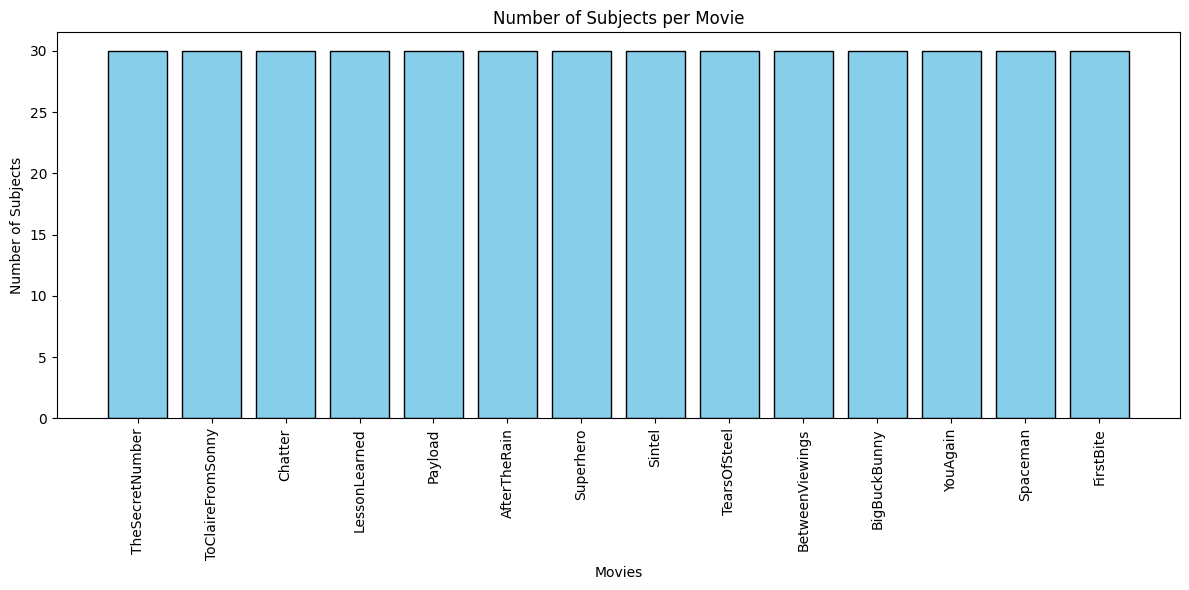

In [8]:
# Count the number of subjects for each movie
subject_counts = {movie: len(subjects) for movie, subjects in extract.items()}

# Extract movies and counts for plotting
movies = list(subject_counts.keys())
counts = list(subject_counts.values())

# Plot the bar chart
plt.figure(figsize=(12, 6))
plt.bar(movies, counts, color='skyblue', edgecolor='black')
plt.title('Number of Subjects per Movie')
plt.xlabel('Movies')
plt.ylabel('Number of Subjects')
plt.xticks(rotation=90)  # Rotate movie names for readability
plt.tight_layout()       # Adjust layout to fit x-axis labels
plt.show()

In [3]:
extract["Sintel"]
#Name Movies: {subject: (start of the mcoie in sec, lenght of the movie)
# start of the movie in TR = int(start of the mcoie in sec / 1.3)

{'S27': (75, 555),
 'S19': (75, 555),
 'S06': (75, 555),
 'S02': (75, 555),
 'S23': (75, 555),
 'S09': (75, 555),
 'S16': (75, 555),
 'S28': (75, 555),
 'S32': (75, 555),
 'S13': (75, 555),
 'S07': (75, 555),
 'S26': (75, 555),
 'S22': (75, 555),
 'S03': (75, 555),
 'S17': (75, 555),
 'S29': (75, 555),
 'S08': (75, 555),
 'S04': (75, 555),
 'S25': (75, 555),
 'S31': (75, 555),
 'S10': (75, 555),
 'S14': (75, 555),
 'S21': (75, 555),
 'S24': (75, 555),
 'S05': (75, 555),
 'S11': (75, 555),
 'S30': (75, 555),
 'S15': (75, 555),
 'S01': (75, 555),
 'S20': (75, 555)}

# Rest frmi

In [14]:
rest = pd.read_csv("/home/dalai/GNN_E/data/raw/rest/Rest_compiled414.csv")
rest.head(2)

,filename,vindex,full_region,partial_region,score,movie_name,parcel,id,session
0,TC_414_sub-S17_Rest.csv,0,7Networks_LH_Vis_1,Vis,-51.340206,Rest,400,sub-S17,ses-1
1,TC_414_sub-S17_Rest.csv,0,7Networks_LH_Vis_1,Vis,-22.464891,Rest,400,sub-S17,ses-1


In [28]:
df_all_movies = pd.read_csv("/home/dalai/GNN_E/data/processed/all_movies_labelled_13_single.csv")

In [31]:
df_rest = pd.read_csv("/home/dalai/GNN_E/data/raw/rest/Rest_compiled414_processed.csv")

In [41]:
df_rest_predictable = df_rest[df_rest.label != -1]
print(len(df_rest_predictable.timestamp_tr.unique()))

df_all_movies_predictable = df_all_movies[df_all_movies.label != -1]
print(len(df_all_movies_predictable.timestamp_tr.unique()))

df_all_movies_predictable_single = df_all_movies_predictable[df_all_movies_predictable.movie == 0]
print(len(df_all_movies_predictable_single.timestamp_tr.unique()))

409
792
383


In [50]:
df_single_movie = df_all_movies[df_all_movies.movie == 0]
df_merge = pd.concat([df_single_movie, df_rest])
df_merge_predictable = df_merge[df_merge.label != -1]
print(df_merge_predictable.groupby(by=["vindex", "id"]).size())
df_merge

vindex  id
0       1     791
        2     791
        3     791
        4     791
        5     791
             ... 
413     28    791
        29    791
        30    791
        31    791
        32    791
Length: 12420, dtype: int64


,Unnamed: 0,vindex,score,id,movie,timestamp_tr,label
0,0,0,-21.180140,1,0,0,-1
1,1,0,-14.295689,1,0,1,-1
2,2,0,-5.882564,1,0,2,-1
3,3,0,30.127113,1,0,3,-1
4,4,0,41.830845,1,0,4,-1
...,...,...,...,...,...,...,...
5713195,5713195,413,11.168295,26,77,455,-1
5713196,5713196,413,55.019140,26,77,456,-1
5713197,5713197,413,-9.323596,26,77,457,-1
5713198,5713198,413,-56.129135,26,77,458,-1
